In [231]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score, f1_score

import warnings
warnings.filterwarnings('ignore')

# A. Data Cleaning & Preprocessing

In [232]:
df = pd.read_csv('hotel_bookings.csv') #membuka data
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [233]:
df.shape #melihat bentuk data 

(119390, 32)

In [130]:
# memilih 16 variabel yang akan digunakan
df2 = df[['hotel', 'is_canceled', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests']].copy()
data.head()

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1


In [234]:
# memilih 5000 baris awal karena data terlalu besar
data = df2.loc[:5002]
data

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4998,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0
4999,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
5000,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
5001,Resort Hotel,0,2,0.0,0,HB,GBR,Online TA,TA/TO,E,1,No Deposit,0,Transient,0,2


In [235]:
data.shape #memeriksa dimensi data yang akan diolah

(5003, 16)

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [134]:
#mengecek adanya data kosong di setiap kolom
data.isnull().sum()

hotel                          0
is_canceled                    0
adults                         0
children                       0
babies                         0
meal                           0
country                        2
market_segment                 0
distribution_channel           0
reserved_room_type             0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
required_car_parking_spaces    0
total_of_special_requests      0
dtype: int64

In [135]:
#melihat modus pada feature country untuk mengisi data kosong
data['country'].describe()

count     4999
unique      56
top        PRT
freq      3175
Name: country, dtype: object

In [285]:
#menghapus data kosong
data = data.dropna()

In [286]:
data

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4998,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0
4999,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
5000,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
5001,Resort Hotel,0,2,0.0,0,HB,GBR,Online TA,TA/TO,E,1,No Deposit,0,Transient,0,2


In [288]:
data.isna().sum()

hotel                          0
is_canceled                    0
adults                         0
children                       0
babies                         0
meal                           0
country                        0
market_segment                 0
distribution_channel           0
reserved_room_type             0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
required_car_parking_spaces    0
total_of_special_requests      0
dtype: int64

In [289]:
# data encoding 

hotel_dict = {'Resort Hotel': 1}
data['Hotel_Ordinal'] = data.hotel.map(hotel_dict)

meal_dict = {'BB': 1, 'FB': 2, 'HB': 3, 'SC': 4, 'Undefined': 5}
data['Meal_Ordinal'] = data.meal.map(meal_dict)

data['country_encoded'] = LabelEncoder().fit_transform(data['country'])

market_dict = {'Direct': 1, 'Corporate': 2, 'Online TA': 3, 'Offline TA/TO': 4, 'Complementary': 5, 'Groups': 6}
data['Market_Ordinal'] = data.market_segment.map(market_dict)

dist_dict = {'TA/TO': 1, 'Direct': 2, 'Corporate': 3}
data['Dist_Ordinal'] = data.distribution_channel.map(dist_dict)

reservedroom_dict = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12}
data['ReservedRoom_Ordinal'] = data.reserved_room_type.map(reservedroom_dict)

deposit_dict = {'No Deposit': 1, 'Refundable': 2, 'Non Refund': 3}
data['Deposit_Ordinal'] = data.deposit_type.map(deposit_dict)

customer_dict = {'Transient': 1, 'Transient-Party': 2, 'Contract': 3, 'Group': 4}
data['Customer_Ordinal'] = data.customer_type.map(customer_dict)

data

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,...,required_car_parking_spaces,total_of_special_requests,Hotel_Ordinal,Meal_Ordinal,country_encoded,Market_Ordinal,Dist_Ordinal,ReservedRoom_Ordinal,Deposit_Ordinal,Customer_Ordinal
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,...,0,0,1,1,43,1,2,3,1,1
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,...,0,0,1,1,43,1,2,3,1,1
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,...,0,0,1,1,24,1,2,1,1,1
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,...,0,0,1,1,24,2,3,1,1,1
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,...,0,1,1,1,24,3,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4998,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,...,0,0,1,3,43,6,2,1,3,1
4999,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,...,0,0,1,3,43,6,2,4,3,1
5000,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,...,0,0,1,3,43,6,2,4,3,1
5001,Resort Hotel,0,2,0.0,0,HB,GBR,Online TA,TA/TO,E,...,0,2,1,3,24,3,1,5,1,1


In [262]:
#finding outlier

def find_outlier(yourList):
    q1 = yourList.describe()['25%']
    q2 = yourList.describe()['50%']
    q3 = yourList.describe()['75%']
    iqr = q3 - q1
    batas_bawah = q1 - 1.5 * iqr
    batas_atas = q3 + 1.5 * iqr
    outlier = []
    for i in yourList:
        if i < batas_bawah or i > batas_atas:
            outlier.append(i)
    return outlier

In [302]:
data['hotelrobust'] = RobustScaler().fit_transform(data[['Hotel_Ordinal']])
data['adultrobust'] = RobustScaler().fit_transform(data[['adults']])
data['childrenrobust'] = RobustScaler().fit_transform(data[['children']])
data['babiesrobust'] = RobustScaler().fit_transform(data[['babies']])
data['mealrobust'] = RobustScaler().fit_transform(data[['Meal_Ordinal']])
data['countryrobust'] = RobustScaler().fit_transform(data[['country_encoded']])
data['marketrobust'] = RobustScaler().fit_transform(data[['Market_Ordinal']])
data['distrobust'] = RobustScaler().fit_transform(data[['Dist_Ordinal']])
data['roomrobust'] = RobustScaler().fit_transform(data[['ReservedRoom_Ordinal']])
data['parkingspacesrobust'] = RobustScaler().fit_transform(data[['required_car_parking_spaces']])
data['specialrequestrobust'] = RobustScaler().fit_transform(data[['total_of_special_requests']])
data['depositrobust'] = RobustScaler().fit_transform(data[['Deposit_Ordinal']])
data['custrobust'] = RobustScaler().fit_transform(data[['Customer_Ordinal']])
data

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,...,babiesrobust,mealrobust,countryrobust,marketrobust,distrobust,roomrobust,depositrobust,custrobust,parkingspacesrobust,specialrequestrobust
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,...,0.0,0.0,0.0,-2.0,1.0,0.666667,0.0,0.0,0.0,0.0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,...,0.0,0.0,0.0,-2.0,1.0,0.666667,0.0,0.0,0.0,0.0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,...,0.0,0.0,-1.0,-2.0,1.0,0.000000,0.0,0.0,0.0,0.0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,...,0.0,0.0,-1.0,-1.0,2.0,0.000000,0.0,0.0,0.0,0.0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,...,0.0,0.0,-1.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4998,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,...,0.0,1.0,0.0,3.0,1.0,0.000000,2.0,0.0,0.0,0.0
4999,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,...,0.0,1.0,0.0,3.0,1.0,1.000000,2.0,0.0,0.0,0.0
5000,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,...,0.0,1.0,0.0,3.0,1.0,1.000000,2.0,0.0,0.0,0.0
5001,Resort Hotel,0,2,0.0,0,HB,GBR,Online TA,TA/TO,E,...,0.0,1.0,-1.0,0.0,0.0,1.333333,0.0,0.0,0.0,2.0


# B. EDA

### Breakfast Choice
Kebanyakan pengunjung hotel memilih paket Bed & Breakfast. Pilihan paket makanan popular kedua adalah Half-Board (Breakfast dan satu waktu makan lainnya).

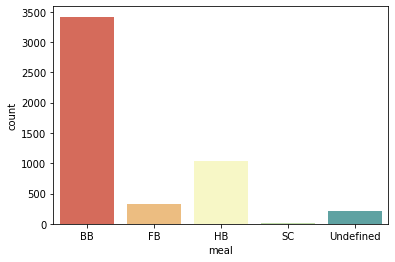

In [181]:
sns.countplot(x ='meal', data = data1, palette = 'Spectral')

### Breakfast Choice based on Market Segment
Kebanyakan customer dari Online Travel Agent memilih paket Bed & Breakfast.

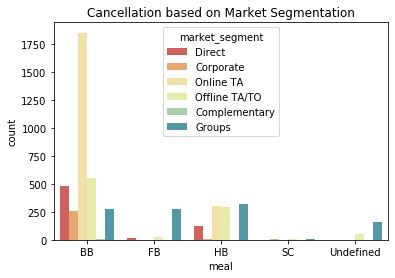

In [180]:
sns.countplot(x = 'meal', hue = 'market_segment', data = data1, palette = 'Spectral')
plt.title('Cancellation based on Market Segmentation')
plt.show()

### Booking Changes
Tidak banyak customer yang melakukan perubahan mengenai booking-an.

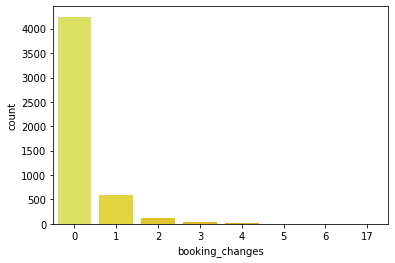

In [293]:
sns.countplot(x ='booking_changes', data = data1, palette = 'Wistia')

### Deposit Type
Kebanyakan customer yang melakukan booking lewat Travel Agent atau Tour Operator tidak melakukan deposit sama sekali.

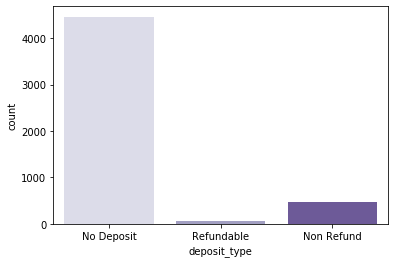

In [295]:
sns.countplot(x ='deposit_type', data = data1, palette = 'Purples')

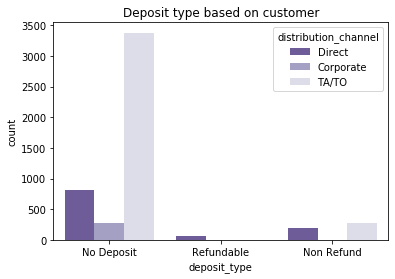

In [297]:
sns.countplot(x = 'deposit_type', hue = 'distribution_channel', data = data1, palette = 'Purples_r')
plt.title('Deposit type based on customer')
plt.show()

### Required Parking Space

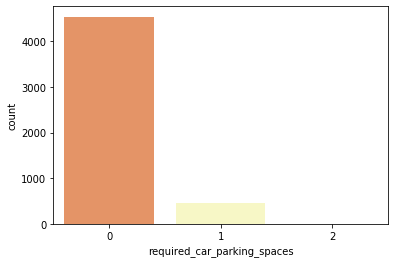

In [300]:
sns.countplot(x ='required_car_parking_spaces', data = data1, palette = 'Spectral')

### Special Request
Data menunjukkan bahwa kebanyakan customer tidak memiliki special request saat mereka menginap di hotel.

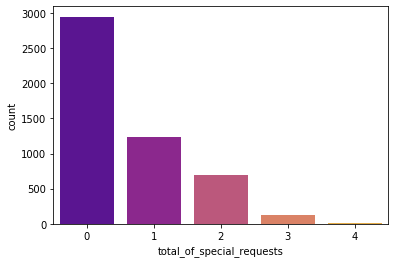

In [303]:
sns.countplot(x ='total_of_special_requests', data = data1, palette = 'plasma')

### Days in Waiting List
Data menunjukkan bahwa tidak banyak customer yang terkena waiting list. Walaupun ada waiting list yang cukup lama yaitu 122 hari.

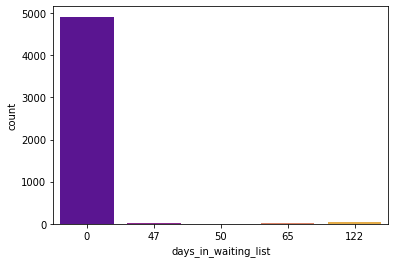

In [305]:
sns.countplot(x ='days_in_waiting_list', data = data1, palette = 'plasma')

### Customer Profile
Kebanyakan customer hotel adalah adults dengan jumlah tamu 2. Berdasarkan data, hotel tidak memiliki banyak customer children atau babies. Kebanyakan customer berasal dari Portugal

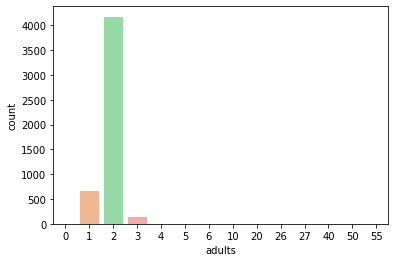

In [185]:
sns.countplot(x ='adults', data = data1, palette = 'pastel')

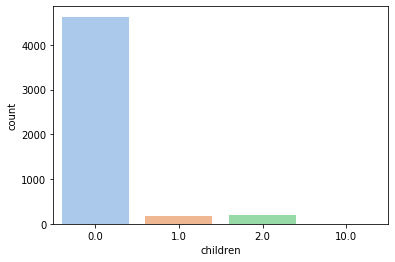

In [186]:
sns.countplot(x ='children', data = data1, palette = 'pastel')

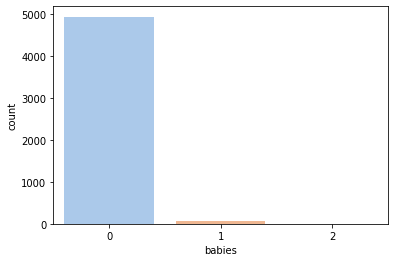

In [187]:
sns.countplot(x ='babies', data = data1, palette = 'pastel')

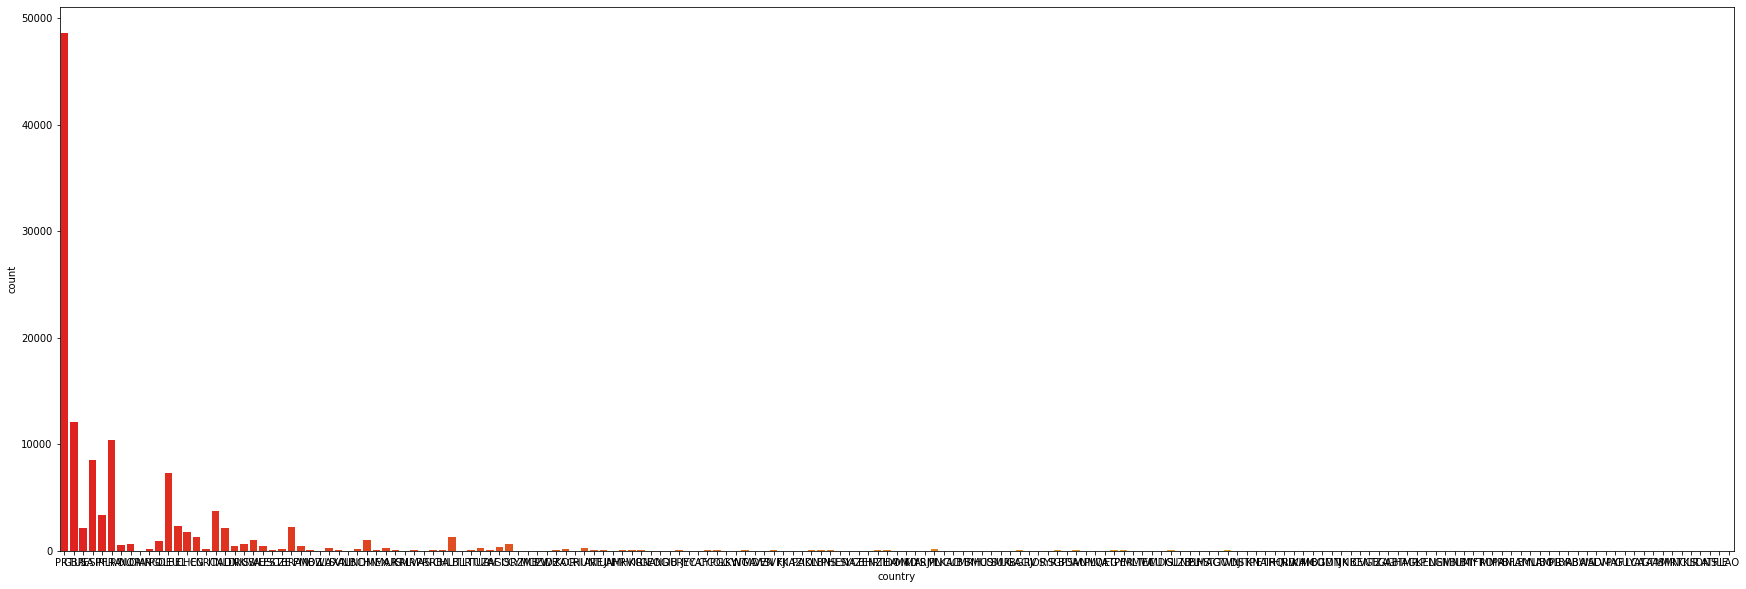

In [237]:
plt.figure(figsize=(30,10))
sns.countplot(x = 'country', data = df, palette = 'autumn')
plt.show()

### Room Bookings
Berdasarkan data yang ada, jenis kamar yang paling banyak di book orang adalah room type A, diikuti dengan room type D dan E.

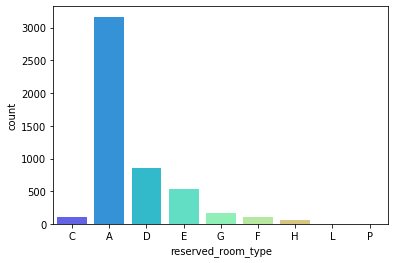

In [191]:
sns.countplot(x ='reserved_room_type', data = data1, palette='rainbow')

### Room Bookings based on Distribution Channel
Kebanyakan customer yang memesan melalui Travel Agent atau Tour Operator memilih room type A. 

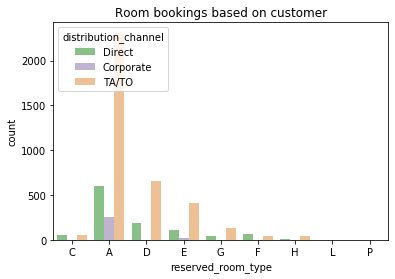

In [197]:
sns.countplot(x = 'reserved_room_type', hue = 'distribution_channel', data = data1, palette = 'Accent')
plt.title('Room bookings based on customer')
plt.show()

### Bookings by Market Segmentation
Dari data bisa dilihat bahwa kebanyakan customer mengetahui hotel dari Online Travel Agent.

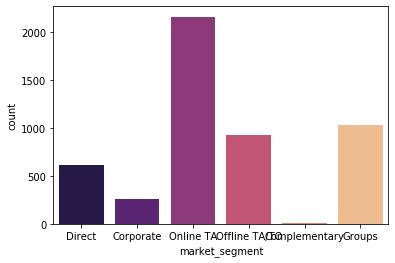

In [169]:
sns.countplot(x ='market_segment', data = data1, palette='magma')

### Cancellation based on Market Segmentation
Dari data bisa terlihat bahwa kebanyakan pemesanan yang dibatalkan datang dari customer yang mengetahui hotel melalui Online Travel Agent.

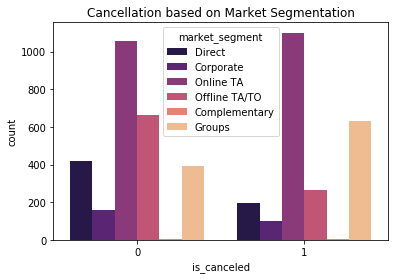

In [165]:
sns.countplot(x = 'is_canceled', hue = 'market_segment', data = data1, palette = 'magma')
plt.title('Cancellation based on Market Segmentation')
plt.show()

### Bookings by Distribution Channel
Dari data bisa dilihat bahwa kebanyakan customer melakukan pemesanan melalui Travel Agent atau Tour Operator.

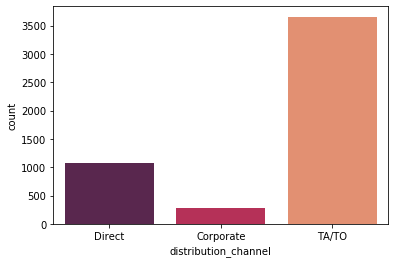

In [168]:
sns.countplot(x ='distribution_channel', data = data1, palette = 'rocket')

### Cancellation based on Distribution Channel
Dari data bisa dilihat bahwa kebanyakan customer yang membatalkan pesanan adalah mereka yang memesan dari Travel Agent/Tour Operators

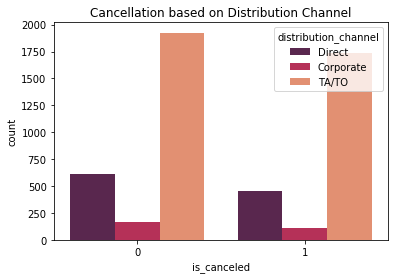

In [174]:
sns.countplot(x = 'is_canceled', hue = 'distribution_channel', data = data1, palette = 'rocket')
plt.title('Cancellation based on Distribution Channel')
plt.show()

# Model Building & Hyper-parameter Tuning

In [270]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc, f1_score, precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

### Logistic Regression

In [355]:
features = ['hotelrobust', 'adultrobust', 'childrenrobust', 'babiesrobust', 'mealrobust', 'countryrobust', 'marketrobust', 'distrobust', 'roomrobust', 'parkingspacesrobust', 'specialrequestrobust', 'depositrobust', 'custrobust']
X = data[features]
y = data['is_canceled']

In [356]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [357]:
model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [358]:
# nilai slope
print(model.coef_)
# nilai intercept
print(model.intercept_)

# y = m1x1 + m2x2 - m3x3 ......... mn.xn + c/intercept

[[ 0.          0.11605686  0.05071675 -0.56991034 -0.18319471  3.48343434
   0.06849798 -0.56128507  0.09483938 -4.62109838 -0.21114446  1.83398645
  -0.46990315]]
[1.09428719]


In [359]:
y_pred = model.predict(x_test)
y_pred[0]

1

In [360]:
# melihat probability
y_pred_proba = model.predict_proba(x_test)
y_pred_proba[0]

array([0.00691067, 0.99308933])

In [361]:
coba = x_test.iloc[:1]
coba

,hotelrobust,adultrobust,childrenrobust,babiesrobust,mealrobust,countryrobust,marketrobust,distrobust,roomrobust,parkingspacesrobust,specialrequestrobust,depositrobust,custrobust
2374,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0


In [362]:
model.predict(coba)

array([1])

              precision    recall  f1-score   support

           0       0.90      0.73      0.81       538
           1       0.75      0.90      0.82       463

    accuracy                           0.81      1001
   macro avg       0.82      0.82      0.81      1001
weighted avg       0.83      0.81      0.81      1001



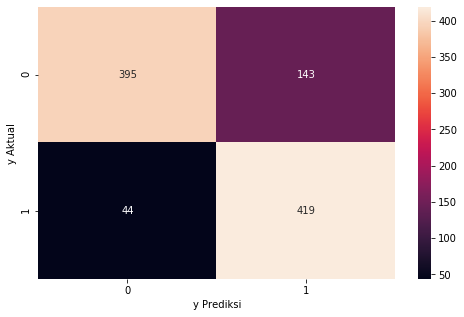

In [366]:
# Confusion Matrix Report
print(classification_report(y_test, y_pred))

# evaluasi dengan confusion matrix 
confusion_matrix(y_test, y_pred)

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax = ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

### Decision Tree

In [367]:
features = ['hotelrobust', 'adultrobust', 'childrenrobust', 'babiesrobust', 'mealrobust', 'countryrobust', 'marketrobust', 'distrobust', 'roomrobust', 'parkingspacesrobust', 'specialrequestrobust', 'depositrobust', 'custrobust']
X = data[features]
y = data['is_canceled']

In [368]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [369]:
y_test.value_counts()

0    538
1    463
Name: is_canceled, dtype: int64

In [370]:
model = DecisionTreeClassifier() # menyimpan model algoritma decision tree ke dalam variabel 'model'
model.fit(x_train, y_train) # model belajar dari data train

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [371]:
# membuat prediksi dengan model yang sudah belajar dari data train
# membuat prediksi dengan data test ---> target prediksi
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 1, 1])

In [372]:
coba = x_test.iloc[:1] #uji coba pada data x_test indeks ke - 0
model.predict(coba)

array([1])

In [373]:
from sklearn import tree

[Text(413.93969210986023, 1064.55, 'X[5] <= -0.026\ngini = 0.497\nsamples = 4000\nvalue = [2164, 1836]'),
 Text(130.66211180124222, 1019.25, 'X[11] <= 1.5\ngini = 0.116\nsamples = 1393\nvalue = [1307, 86]'),
 Text(105.59254658385093, 973.95, 'X[10] <= 0.5\ngini = 0.049\nsamples = 1315\nvalue = [1282, 33]'),
 Text(66.54409937888198, 928.6500000000001, 'X[6] <= 0.5\ngini = 0.081\nsamples = 712\nvalue = [682, 30]'),
 Text(52.218633540372664, 883.35, 'X[9] <= 0.5\ngini = 0.139\nsamples = 266\nvalue = [246, 20]'),
 Text(48.52173913043478, 838.05, 'X[12] <= 0.5\ngini = 0.175\nsamples = 207\nvalue = [187, 20]'),
 Text(44.82484472049689, 792.75, 'X[5] <= -0.632\ngini = 0.218\nsamples = 161\nvalue = [141, 20]'),
 Text(41.127950310559, 747.45, 'X[5] <= -0.737\ngini = 0.232\nsamples = 149\nvalue = [129, 20]'),
 Text(33.73416149068323, 702.1500000000001, 'X[5] <= -1.395\ngini = 0.209\nsamples = 143\nvalue = [126, 17]'),
 Text(30.03726708074534, 656.85, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),

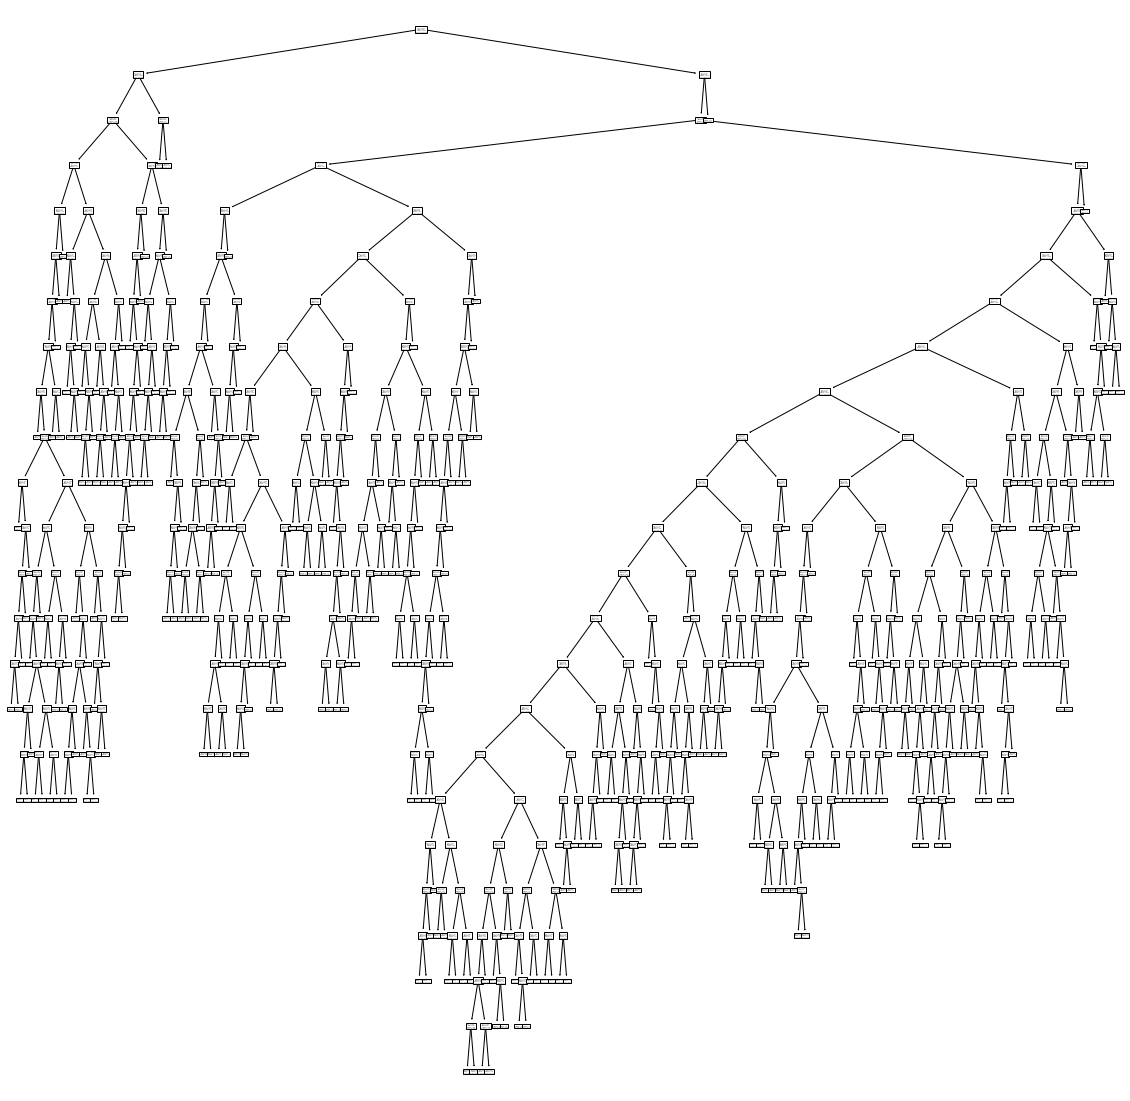

In [374]:
plt.figure(figsize=(20, 20))
tree.plot_tree(model.fit(x_train, y_train))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       538
           1       0.84      0.86      0.85       463

    accuracy                           0.86      1001
   macro avg       0.86      0.86      0.86      1001
weighted avg       0.86      0.86      0.86      1001



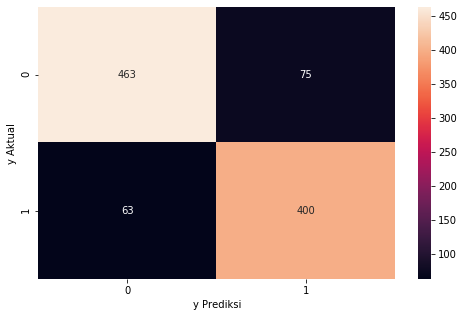

In [375]:
# Confusion Matrix Report
print(classification_report(y_test, y_pred))

# evaluasi dengan confusion matrix 
confusion_matrix(y_test, y_pred)

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax = ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

### Random Forest

In [376]:
features = ['hotelrobust', 'adultrobust', 'childrenrobust', 'babiesrobust', 'mealrobust', 'countryrobust', 'marketrobust', 'distrobust', 'roomrobust', 'parkingspacesrobust', 'specialrequestrobust', 'depositrobust', 'custrobust']
X = data[features]
y = data['is_canceled']

In [377]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [378]:
# import evaluation metrics
from sklearn.metrics import mean_squared_error

# import regression models
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge, ElasticNet, HuberRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [380]:
model = RandomForestClassifier() # menyimpan model algoritma decision tree ke dalam variabel 'model'
model.fit(x_train, y_train) # model belajar dari data train

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [381]:
# membuat prediksi dengan model yang sudah belajar dari data train
# membuat prediksi dengan data test ---> target prediksi
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 1, 1])

In [382]:
coba = x_test.iloc[:1] #uji coba pada data x_test indeks ke - 0
model.predict(coba)

array([1])

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       538
           1       0.84      0.88      0.86       463

    accuracy                           0.87      1001
   macro avg       0.86      0.87      0.86      1001
weighted avg       0.87      0.87      0.87      1001



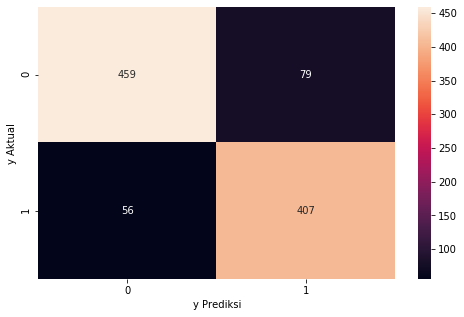

In [383]:
# Confusion Matrix Report
print(classification_report(y_test, y_pred))

# evaluasi dengan confusion matrix 
confusion_matrix(y_test, y_pred)

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax = ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

Jenis kesalahan yang paling merugikan adalah jika machine learning salah memprediksi kemungkinan pesanan di cancel atau tidak. Ini akan berpengaruh ke revenue dan operational cost yang mungkin sudah dikeluarkan. Tidak hanya itu, jika ada kesalahan prediksi, hotel bisa mengalami kerugian karena sudah menolak pesanan potential customer.

### Hyper Parameter Tuning

### Logistic Regression

In [384]:
# parameter model logistic regression yang akan dituned + value di setiap parameter
penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinier', 'sag', 'saga']
max_iter = [1, 10, 100, 1000, 10000]

# simpan dalam variabel dengan nama 'param'
param = {'penalty': penalty, 'solver': solver, 'max_iter': max_iter}
param

{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'solver': ['newton-cg', 'lbfgs', 'liblinier', 'sag', 'saga'],
 'max_iter': [1, 10, 100, 1000, 10000]}

In [385]:
model_LR = LogisticRegression()
model_LR_GS = GridSearchCV(model_LR, param, cv = 5)

In [386]:
model_LR_GS.fit(X_train, y_train)
model_LR_GS.best_params_

{'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}

In [388]:
# model after tuning
model_LogReg_GS = LogisticRegression(solver='newton-cg', penalty = 'none', max_iter = 100)
model_LogReg_GS.fit(x_train, y_train)

y_pred_GS = model_LogReg_GS.predict(x_test)

pd.DataFrame(data = [accuracy_score(y_test, y_pred_GS)*100, recall_score(y_test, y_pred_GS)*100,
                    precision_score(y_test, y_pred_GS)*100, roc_auc_score(y_test, y_pred_GS)*100,
                    f1_score(y_test, y_pred_GS)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

,Score (%)
accuracy,81.418581
recall,90.496760
precision,74.688057
roc_auc_score,82.051354
f1_score,81.835937


In [391]:
pd.DataFrame(data = [model_LogReg_GS.score(x_train, y_train)*100,
                    model_LogReg_GS.score(x_test, y_test)*100],
             index = ['Model Score in Data Train', 'Model Score in Data Test'],
             columns = ['Score (%)']
            )

,Score (%)
Model Score in Data Train,81.400000
Model Score in Data Test,81.418581
